<a href="https://colab.research.google.com/github/Hagar633/Machine-learning-/blob/main/gradient_onefeature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

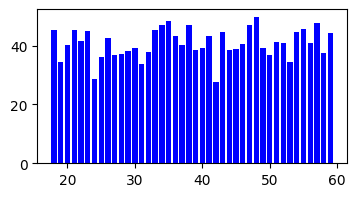

Line: y = -0.007486832463279683x + 25.201743974394017
Cost Function (MSE): 44.31340755734441
Epoch 0: Cost = 664.565000137351
Epoch 10: Cost = 660.8636200306446
Epoch 20: Cost = 657.1744455106844
Epoch 30: Cost = 653.4974765774712
Epoch 40: Cost = 649.8327132310044
Final Line: y = 0.0096257739979445x + 0.0002491212744090441


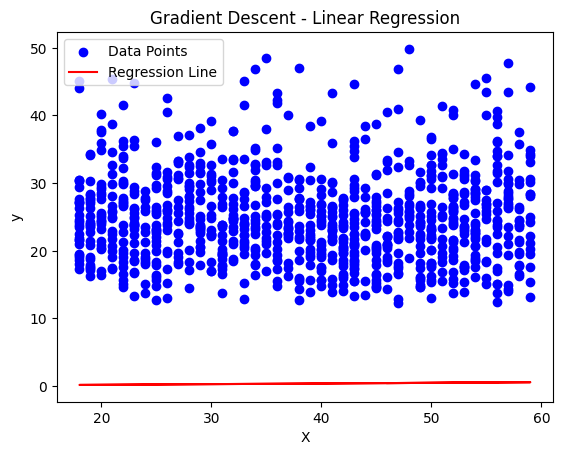

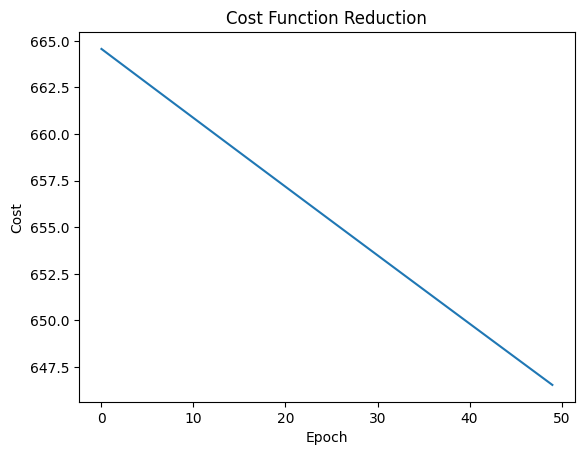

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('gym_members_exercise_tracking.csv')

df.head()
plt.figure(figsize=(4,2))
plt.bar(df['Age'],df['BMI'],color='blue')
plt.show()
x= np.array (df['Age'])
y= np.array(df['BMI'])
m, b = np.polyfit(x, y, 1)
print(f"Line: y = {m}x + {b}")

y_pred = m*x+ b
cost = np.mean((y - y_pred)**2)
print(f"Cost Function (MSE): {cost}")

def compute_cost(x, y, m, b):
    n = len(x)
    Y_pred = m * x + b
    cost = (1/n) * np.sum((y - Y_pred)**2)
    return cost

def gradient_descent(x, y, M, B, learning_rate, epochs):
    n = len(x)
    cost_history = []

    for i in range(epochs):
        Y_pred = m * x + b
        error = y - Y_pred

        m_grad = (-2/n) * np.sum(x * error)
        b_grad = (-2/n) * np.sum(error)

        M = M - learning_rate * m_grad
        B = B - learning_rate * b_grad

        cost = compute_cost(x, y, M, B)
        cost_history.append(cost)

        if i % 10 == 0:
            print(f"Epoch {i}: Cost = {cost}")

    return M, B, cost_history
m = 0
b = 0
learning_rate = 0.0000001
epochs = 50

m, b, cost_history = gradient_descent(x, y, m, b, learning_rate, epochs)

print(f"Final Line: y = {m}x + {b}")

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, m*x + b, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Gradient Descent - Linear Regression')
plt.show()

plt.plot(range(epochs), cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function Reduction')
plt.show()
